In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [1]:
df1 = pd.read_csv("../outputs/s1s2/s1s2-f2.tsv", sep='\t')
df2 = pd.read_csv("../outputs/s1s4/s1s4-f2.tsv", sep='\t')

In [169]:
df1.head()

,regulatoryGene,targetGene,weight
0,ENSG00000218227,MYOCD,0.005801
1,PDZK1IP1,EMILIN1,0.005204
2,CTSE,BICDL2,0.005104
3,RGS1,CACNA1E,0.005079
4,AK5,CCL23,0.004905


In [170]:
df2.head()

,regulatoryGene,targetGene,weight
0,MIR4458HG,SDHAF4,0.006545
1,BCL2L10,ATP6V0C,0.006036
2,RXRA,CACNA1E,0.005659
3,DES,C11orf53,0.004978
4,MIR4458HG,PVT1,0.004797


In [171]:
def locate(df, r):
    r1 = r['regulatoryGene']
    r2 = r['targetGene']
    
    return df.loc[((df['regulatoryGene']==r1) & (df['targetGene']==r2))].shape[0]

In [172]:
j = []
k = []
for i, r in df1.iterrows():
    s = locate(df2, r)
    if s == 0:
        j.append(r['weight'])
    elif s == 1:
        k.append(r['weight'])
    elif s > 1:
        print("salam")

salam
salam
salam
salam
salam
salam
salam
salam
salam
salam
salam


In [173]:
print('len(j)={}, len(k)={}'.format(len(j), len(k)))

len(j)=111712, len(k)=25170


In [177]:
max(k)

0.00580080348405657

In [27]:
# Scale rawcounts

In [131]:
df = pd.read_csv("../outputs/s1s4/s1s4-logcounts.tsv", sep='\t', index_col=0)

In [132]:
df.head()

,stage11,stage12,stage13,stage14,stage15,stage16,stage17,stage18,stage41,stage42,stage43,stage44,stage45,stage46,stage47,stage48,stage49,stage410,stage411,stage412
ENSG00000000003.13,6.443,8.017,7.000,6.615,7.781,8.033,8.267,6.000,5.615,6.267,6.508,6.129,6.304,7.358,8.558,6.066,7.229,6.931,7.340,8.017
ENSG00000000005.5,0.000,0.000,0.000,0.000,1.000,0.000,3.585,1.585,1.000,0.000,0.000,1.585,0.000,2.322,1.000,0.000,2.585,0.000,0.000,2.585
ENSG00000000419.11,9.979,10.410,11.000,10.620,11.480,9.683,10.630,10.210,10.950,11.330,10.160,10.770,8.820,11.290,11.310,11.180,9.838,10.170,10.110,11.060
ENSG00000000457.12,7.508,9.418,10.190,7.994,9.003,7.109,10.740,8.994,9.324,10.090,8.414,10.220,7.687,10.780,9.822,9.886,8.299,8.200,9.079,9.866
ENSG00000000460.15,8.676,9.409,9.331,9.392,10.040,8.082,9.709,9.098,9.200,10.990,7.426,10.410,6.508,11.250,9.226,10.540,7.044,8.842,8.124,10.720


In [133]:
colnames= df.columns
rownames= df.index

In [134]:
scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)

In [135]:
df = pd.DataFrame(df, columns=colnames, index=rownames)

In [136]:
df.to_csv("../outputs/s1s4/z4-logcounts.csv")

In [137]:
df.head()

,stage11,stage12,stage13,stage14,stage15,stage16,stage17,stage18,stage41,stage42,stage43,stage44,stage45,stage46,stage47,stage48,stage49,stage410,stage411,stage412
ENSG00000000003.13,0.961100,1.238778,0.851920,0.956730,1.161408,1.482316,1.231649,0.769033,0.622984,0.725665,0.815922,0.706542,1.051963,0.953062,1.168458,0.689414,1.079871,1.025692,1.092062,1.062552
ENSG00000000005.5,-0.701334,-0.714279,-0.762318,-0.697137,-0.469385,-0.645931,0.118603,-0.321055,-0.498370,-0.729254,-0.739975,-0.355039,-0.677697,-0.213489,-0.560497,-0.720712,-0.096789,-0.682447,-0.762300,-0.185402
ENSG00000000419.11,1.873464,1.821748,1.774342,1.958051,2.050997,1.919464,1.793402,1.808506,1.919284,1.901068,1.689023,1.790784,1.742291,1.863880,1.798001,1.878234,1.740918,1.823941,1.791869,1.761654
ENSG00000000457.12,1.235893,1.580082,1.587551,1.301505,1.455293,1.237513,1.819553,1.508269,1.524198,1.613195,1.271598,1.662291,1.431424,1.745743,1.457609,1.577426,1.350979,1.338436,1.531399,1.487343
ENSG00000000460.15,1.537262,1.577890,1.389461,1.651029,1.704685,1.495298,1.574454,1.533947,1.494068,1.822135,1.035393,1.706680,1.107936,1.854615,1.321269,1.729458,1.032997,1.496657,1.290130,1.683542


In [1]:
# venn diagrams

In [2]:
from matplotlib_venn import venn2, venn2_circles
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt

In [23]:
d1 = pd.read_csv("../outputs/s1s2/deg_s1s2.csv")
#d2 = pd.read_csv("../outputs/s1s3/deg_s1s3.csv", index_col=0)
d3 = pd.read_csv("../outputs/s1s4/deg_s1s4.csv")
#d4 = pd.read_csv("../outputs/s2s3/deg_s2s3.csv", index_col=0)
#d5 = pd.read_csv("../outputs/s2s4/deg_s2s4.csv", index_col=0)
#d6 = pd.read_csv("../outputs/s3s4/deg_s3s4.csv", index_col=0)

In [24]:
d3.head()

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,ensembl,symbol
0,ENSG00000141052.16,440.732948,6.670669,0.889864,7.496280,6.565466e-14,1.217040e-09,ENSG00000141052,MYOCD
1,ENSG00000164047.4,1352.479431,-4.541579,0.718753,-6.318691,2.637880e-10,1.629946e-06,ENSG00000164047,CAMP
2,ENSG00000259078.2,33.467552,4.634223,0.731749,6.333079,2.403171e-10,1.629946e-06,ENSG00000259078,NaN
3,ENSG00000261226.1,40.163274,3.129394,0.502313,6.229966,4.665374e-10,2.162051e-06,ENSG00000261226,NaN
4,ENSG00000269821.1,130.300016,2.203808,0.358177,6.152848,7.610397e-10,2.821479e-06,ENSG00000269821,KCNQ1OT1


In [25]:
#print(len(i1),len(i2),len(i3),len(i4),len(i5),len(i6))
anno = pd.read_csv("../new/data/GeneAnnotation.csv", sep=',')
anno.head()

,ensembl_Id,genename
0,ENSG00000223972,DDX11L1
1,ENSG00000227232,WASH7P
2,ENSG00000278267,MIR6859-3
3,ENSG00000243485,RP11-34P13.3
4,ENSG00000274890,MIR1302-9


In [26]:
anno.rename(columns = {'ensembl_Id': 'ensembl'}, inplace=True)
anno.head()

,ensembl,genename
0,ENSG00000223972,DDX11L1
1,ENSG00000227232,WASH7P
2,ENSG00000278267,MIR6859-3
3,ENSG00000243485,RP11-34P13.3
4,ENSG00000274890,MIR1302-9


In [27]:
d1.head()

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,ensembl,symbol
0,ENSG00000259078.2,23.395902,4.038934,0.668908,6.038097,1.559424e-09,0.000031,ENSG00000259078,NaN
1,ENSG00000117472.8,127.659353,-3.427091,0.583741,-5.870914,4.333987e-09,0.000043,ENSG00000117472,TSPAN1
2,ENSG00000150750.6,46.097013,-4.574981,0.825908,-5.539333,3.036251e-08,0.000161,ENSG00000150750,C11orf53
3,ENSG00000196188.9,80.616096,-4.977625,0.900249,-5.529165,3.217593e-08,0.000161,ENSG00000196188,CTSE
4,ENSG00000173898.10,412.580681,4.248184,0.777307,5.465258,4.622331e-08,0.000185,ENSG00000173898,SPTBN2


In [28]:
d1 = d1.merge(anno, left_on='ensembl', right_on='ensembl')
d3 = d3.merge(anno, left_on='ensembl', right_on='ensembl')

In [29]:
d1 = d1.set_index("Unnamed: 0")
d3 = d3.set_index("Unnamed: 0")

In [30]:
s1s2 = set(d1.index)
#s1s3 = set(d2.index)
s1s4 = set(d3.index)
#s2s3 = set(d4.index)
#s2s4 = set(d5.index)
#s3s4 = set(d6.index)

In [64]:
print(len(s1s2),len(s1s3),len(s1s4),len(s2s3),len(s2s4),len(s3s4))

53 28 207 2 32 25


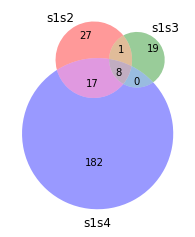

In [65]:
venn3([s1s2,s1s3,s1s4], set_labels = ('s1s2','s1s3', 's1s4'))

In [31]:
d1.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,ensembl,symbol,genename
Unnamed: 0,,,,,,,,,
ENSG00000259078.2,23.395902,4.038934,0.668908,6.038097,1.559424e-09,0.000031,ENSG00000259078,NaN,PTBP1P
ENSG00000117472.8,127.659353,-3.427091,0.583741,-5.870914,4.333987e-09,0.000043,ENSG00000117472,TSPAN1,TSPAN1
ENSG00000150750.6,46.097013,-4.574981,0.825908,-5.539333,3.036251e-08,0.000161,ENSG00000150750,C11orf53,C11orf53
ENSG00000196188.9,80.616096,-4.977625,0.900249,-5.529165,3.217593e-08,0.000161,ENSG00000196188,CTSE,CTSE
ENSG00000173898.10,412.580681,4.248184,0.777307,5.465258,4.622331e-08,0.000185,ENSG00000173898,SPTBN2,SPTBN2


In [32]:
s = s1s2.intersection(s1s4)

In [11]:
s = s1s2.intersection(s1s3, s1s4)

In [33]:
for i in s:
    print(d1.loc[i]['symbol'], '\t' + str(d1.loc[i]['log2FoldChange']), '\t' + str(d3.loc[i]['log2FoldChange']))

RASGRP4 	2.46714758316757 	2.3549413677555
FFAR2 	2.6973506767489397 	3.6751824965670497
CABLES1 	2.2018677880535003 	2.8581037852697904
C11orf53 	-4.574981262283839 	-3.5051735766205496
ADAMTS6 	2.3643708860622503 	2.0873926891325802
CTSE 	-4.977624730826871 	-4.92981446877325
BARX2 	-3.65171682963786 	-3.3611800259369504
SHANK1 	-2.90619448646591 	-3.4173962310197097
MYOCD 	3.9947139432469796 	6.670669246223331
nan 	3.7268915344969904 	4.3692857617222
MEFV 	2.7999130176483304 	2.8908685765053797
CACNA1E 	3.89667768120171 	3.8064805074821297
KCNQ1OT1 	1.69702729559704 	2.20380760826682
TMEM132B 	4.64498851403681 	4.811166956909861
SPTBN2 	4.2481837893917 	3.3646886966264904
nan 	3.1439045305450297 	3.1293938096218197
CASP5 	3.3447458456821697 	4.1662796431415705
CXCL2 	2.66323357962152 	2.19057027210369
BCL2L10 	5.00503350494086 	4.695188628964821
VWCE 	2.7626863676361 	2.6003443766882204
nan 	4.594313184668519 	4.53564559046853
SOX7 	1.9639754203631399 	1.95627421973198
CCL8 	2.71727

In [34]:
import numpy as np
import matplotlib.pyplot as plt

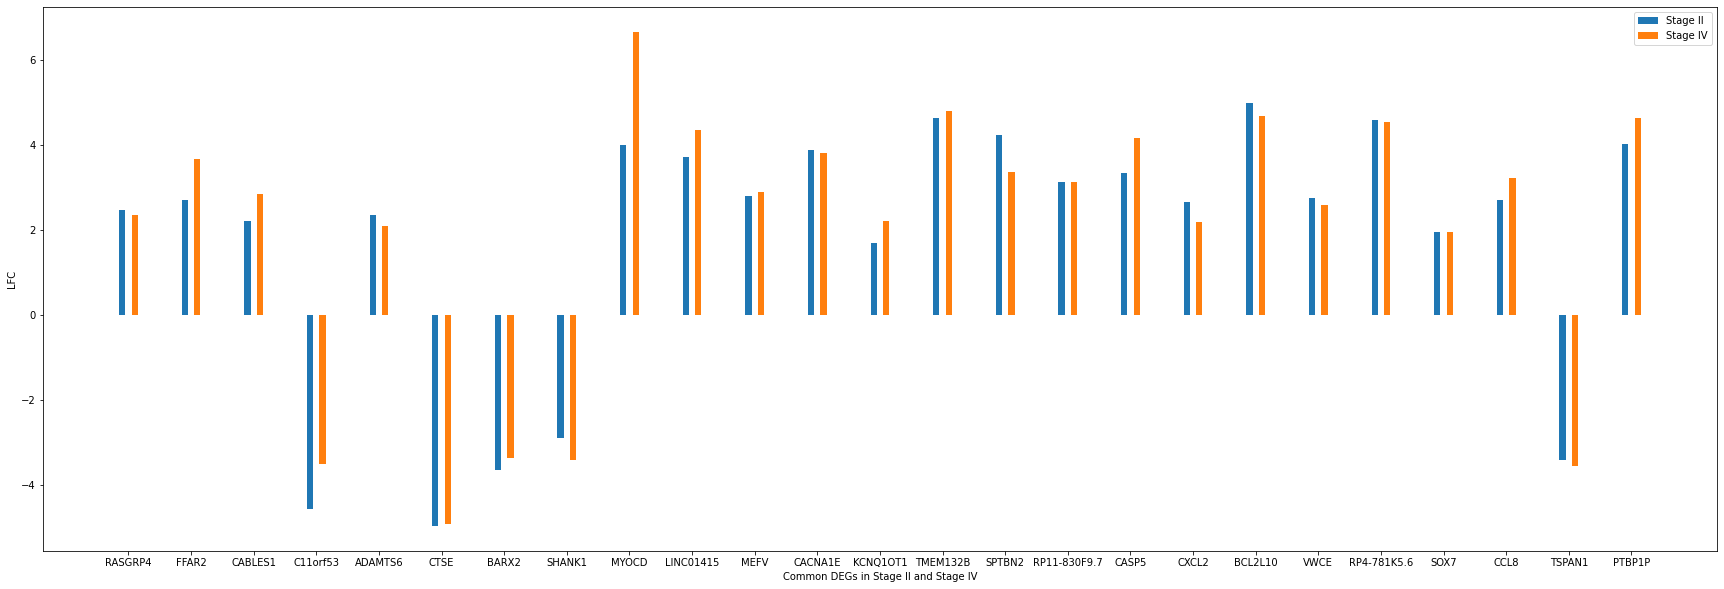

In [35]:
genes = []
s2 = []
#s3 = []
s4 = []
for i in s:
    genes.append(d1.loc[i]['genename'])
    s2.append(d1.loc[i]['log2FoldChange'])
    #s3.append(d2.loc[i]['log2FoldChange'])
    s4.append(d3.loc[i]['log2FoldChange'])

x_axis = np.arange(len(genes))
plt.figure(figsize=(30, 10))
plt.bar(x_axis - 0.1, s2, 0.1, label = 'Stage II')
#plt.bar(x_axis - 0.0, s3, 0.05, label = 'S1S3')
plt.bar(x_axis + 0.1, s4, 0.1, label = 'Stage IV')
  
plt.xticks(x_axis, genes)
plt.xlabel("Common DEGs in Stage II and Stage IV")
plt.ylabel("LFC")
plt.title("")
plt.legend()
#plt.show()
plt.savefig("barplot_s2s4.png")

In [183]:
def avg_counts(df, trans_id, fi, si):
    counts = df.loc[df.index == trans_id].iloc[0, fi:si]
    sum = 0
    for i in counts:
        sum += i
    return sum/len(counts)

In [185]:
lg1 = pd.read_csv("../outputs/s1s2/s1s2-logcounts.csv", sep=',', index_col=0)
lg2 = pd.read_csv("../outputs/s1s3/s1s3-logcounts.csv", sep=',', index_col=0)
lg3 = pd.read_csv("../outputs/s1s4/s1s4-logcounts.csv", sep=',', index_col=0)

In [229]:
trans_id = d1.loc[d1['symbol']=='MYOCD'].index[0]

In [230]:
avg_counts(lg1, trans_id, 0, 8)

2.56925

In [231]:
avg_counts(lg1, trans_id, 8, 25)

5.280117647058823

In [232]:
avg_counts(lg2, trans_id, 8, 13)

4.068

In [233]:
avg_counts(lg3, trans_id, 8, 20)

7.256083333333334

In [235]:
#lg3.loc[lg3.index == trans_id].iloc[0, 8:20]

In [234]:
trans_id

'ENSG00000141052.16'

In [236]:
# gene correlation

In [237]:
s = s1s2.intersection(s1s3, s1s4)

In [246]:
df = lg2.loc[list(s)].iloc[:,0:8].T

In [251]:
df.columns = d1.loc[s]['symbol'].values

In [252]:
df.corr()

,C11orf53,CACNA1E,SPTBN2,CCL8,VWCE,FFAR2,CASP5,CABLES1
C11orf53,1.000000,0.455134,0.471685,-0.135869,0.335056,0.204548,0.178909,0.230251
CACNA1E,0.455134,1.000000,-0.227607,0.490408,-0.106574,0.284719,0.592736,0.359556
SPTBN2,0.471685,-0.227607,1.000000,-0.510750,0.818785,0.108096,0.152699,0.349517
CCL8,-0.135869,0.490408,-0.510750,1.000000,-0.135657,0.532678,0.675604,0.135259
VWCE,0.335056,-0.106574,0.818785,-0.135657,1.000000,0.148227,0.406073,0.557856
FFAR2,0.204548,0.284719,0.108096,0.532678,0.148227,1.000000,0.484941,0.182465
CASP5,0.178909,0.592736,0.152699,0.675604,0.406073,0.484941,1.000000,0.634000
CABLES1,0.230251,0.359556,0.349517,0.135259,0.557856,0.182465,0.634000,1.000000


In [253]:
df = lg3.loc[list(s)].iloc[:,9:25].T

In [254]:
df.columns = d1.loc[s]['symbol'].values

In [255]:
df.corr()

,C11orf53,CACNA1E,SPTBN2,CCL8,VWCE,FFAR2,CASP5,CABLES1
C11orf53,1.000000,0.181971,-0.437800,0.200116,-0.721221,0.325743,0.106701,-0.347858
CACNA1E,0.181971,1.000000,-0.463778,0.180722,-0.091539,0.238377,0.097971,-0.487718
SPTBN2,-0.437800,-0.463778,1.000000,0.333901,0.665133,0.302107,0.537768,0.749173
CCL8,0.200116,0.180722,0.333901,1.000000,-0.036393,0.922609,0.959979,0.388808
VWCE,-0.721221,-0.091539,0.665133,-0.036393,1.000000,-0.011774,0.152460,0.593708
FFAR2,0.325743,0.238377,0.302107,0.922609,-0.011774,1.000000,0.930842,0.418314
CASP5,0.106701,0.097971,0.537768,0.959979,0.152460,0.930842,1.000000,0.522314
CABLES1,-0.347858,-0.487718,0.749173,0.388808,0.593708,0.418314,0.522314,1.000000


In [257]:
for i in df.columns:
    print(i)

C11orf53
CACNA1E
SPTBN2
CCL8
VWCE
FFAR2
CASP5
CABLES1
